In [29]:
#EJERCICIO 6
#Entrena un modelo en Keras con capas convolucionales para predecir el valor diario de cirre
#de bolsa de facebook (puedes usar los datos que vimos en clase y que están en kaggle).
#Utiliza de los datos de 10 días anteriores para predecir el valor del día actual.

In [30]:
#Cargo algunas librerias que necesitare para este ejercicio
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense
import matplotlib.pyplot as plt

In [31]:
#fb = pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Practica_ignacio_bermejo\\fb.csv', sep=',')
fb = pd.read_csv('fb.csv', sep=',')
print(fb)

            Date    Open     High      Low   Close     Volume  OpenInt
0     2012-05-18   42.05   45.000   38.000   38.23  580438450        0
1     2012-05-21   36.53   36.660   33.000   34.03  169418988        0
2     2012-05-22   32.61   33.590   30.940   31.00  101876406        0
3     2012-05-23   31.37   32.500   31.360   32.00   73678512        0
4     2012-05-24   32.95   33.210   31.770   33.03   42560731        0
...          ...     ...      ...      ...     ...        ...      ...
1376  2017-11-06  178.56  180.450  178.310  180.17   13275578        0
1377  2017-11-07  180.50  180.748  179.403  180.25   12903836        0
1378  2017-11-08  179.79  180.350  179.110  179.56   10467606        0
1379  2017-11-09  178.31  179.400  177.090  179.30   12602188        0
1380  2017-11-10  178.35  179.100  177.960  178.46   11060355        0

[1381 rows x 7 columns]


In [32]:
#Preparo los datos
scaler=MinMaxScaler(feature_range=(0,1))
scaler_fb=scaler.fit_transform(fb['Close'].values.reshape(-1,1))

In [33]:
#Hago la particion de los datos con para entrenar el modelo y poder predecir la cotizacion con el cierre y le paso los dias que tengo que predecir
predecir_dias=1 #tenia puesto 10 por lo que predecia los 10 dias siguientes, lee mejor el puto enuciadoooooooooooo

xx_train=[]
zz_train=[]

In [34]:
for x in range(predecir_dias, len(scaler_fb)):
    xx_train.append(scaler_fb[x-predecir_dias:x, 0])
    zz_train.append(scaler_fb[x, 0])

xx_train, zz_train=np.array(xx_train), np.array(zz_train)
xx_train=np.reshape(xx_train, (xx_train.shape[0], xx_train.shape[1], 1))

In [35]:
#Creo el modelo to guapo con mis convolucionales
model_6=Sequential()

model_6.add(LSTM(units=50, return_sequences=True, input_shape=(xx_train.shape[1], 1)))
model_6.add(Dropout(0.2))
model_6.add(LSTM(units=50, return_sequences=True))
model_6.add(Dropout(0.2))
model_6.add(LSTM(units=50))
model_6.add(Dropout(0.2))
model_6.add(Dense(1)) #esta es la que me predice el cierre del dia siguiente

In [36]:
#compilo el modelo pasandole Adam como optimizador y como funcion de perdida Mean_Square_Error
model_6.compile(optimizer='adam',loss='mean_squared_error')

In [37]:
#Entreno el modelo
model_6.fit(xx_train, zz_train, epochs=25, batch_size=32)

Epoch 1/25
44/44 [==============================] - 8s 8ms/step - loss: 0.1462
Epoch 2/25
44/44 [==============================] - 0s 7ms/step - loss: 0.0370
Epoch 3/25
44/44 [==============================] - 0s 7ms/step - loss: 0.0130
Epoch 4/25
44/44 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 5/25
44/44 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 6/25
44/44 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 7/25
44/44 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 8/25
44/44 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 9/25
44/44 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 10/25
44/44 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 11/25
44/44 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 12/25
44/44 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 13/25
44/44 [==============================

In [38]:
#Ahora compruebo la precision del modelo, para ello veo la fecha en la que empieza la cotizacion y la ultima fecha
#esto era porque lo intente haciendo web scrapping pero se me jodio hoy jaja
test_comienzo=dt.datetime(2012,5,18)
test_fin=dt.datetime.now()

In [39]:
test_comienzo=fb['Date'].first
test_fin=fb['Date'].last

In [40]:
fb_test = pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\\Practica_ignacio_bermejo\\fb.csv', sep=',')
#fb_test = pd.read_csv('fb.csv', sep=',')

precio_actual = fb_test['Close'].values
print(precio_actual)

[ 38.23  34.03  31.   ... 179.56 179.3  178.46]


In [41]:
#Ahora debo concatenar los datasets para poder hacer la prediccion para los siguientes 10 dias
total_datos = pd.concat((fb['Close'], fb_test['Close']), axis=0)
print(total_datos)

0        38.23
1        34.03
2        31.00
3        32.00
4        33.03
         ...  
1376    180.17
1377    180.25
1378    179.56
1379    179.30
1380    178.46
Name: Close, Length: 2762, dtype: float64


In [42]:
#con esto predigo los siguientes precios
model_inputs = total_datos[len(total_datos) - len(fb_test) - predecir_dias:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [43]:
#Hago las predicciones sobre los datos de test
xx_test = []

for x in range(predecir_dias, len(model_inputs)):
  xx_test.append(model_inputs[x-predecir_dias:x, 0])

xx_test = np.array(xx_test)
xx_test = np.reshape(xx_test, (xx_test.shape[0], xx_test.shape[1], 1))#el 1 se pone para añadirle una dimension extra

In [44]:
precios_predecidos = model_6.predict(xx_test)
precios_predecidos = scaler.inverse_transform(precios_predecidos)
print(precios_predecidos)

[[173.4189  ]
 [ 38.327785]
 [ 34.232727]
 ...
 [174.97256 ]
 [174.37454 ]
 [174.14894 ]]


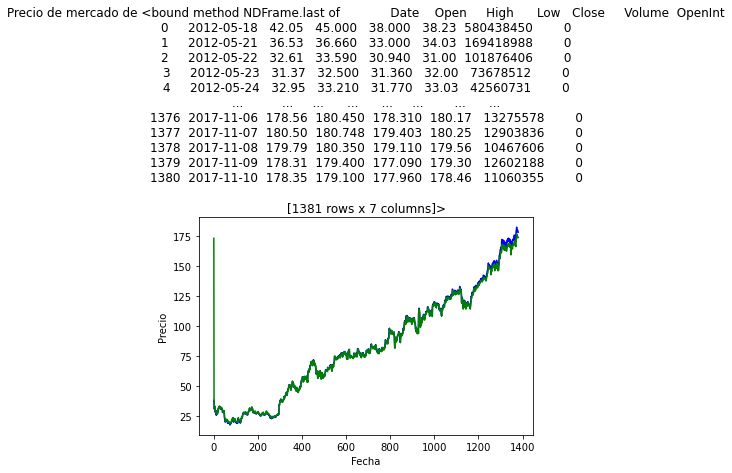

In [45]:
#Grafico los resultados para que sean mas visuales
plt.plot(precio_actual, color='blue', label=f'Precio {fb.last} actual') #'activo' es lo que tenia para cuando estaba haciendo webscrapping que se ha ido a la mierda
plt.plot(precios_predecidos, color='green', label=f'Precio {fb.last} predecido')
plt.title(f'Precio de mercado de {fb.last}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
#plt.legend()
plt.show()

No handles with labels found to put in legend.


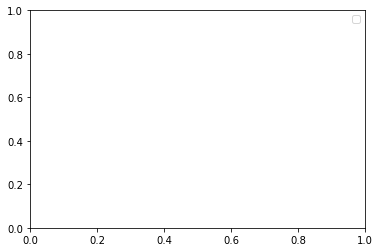

In [46]:
#Lo pongo aqui aparte porque se me ponia encima de la prediccion y no se podia ver 
plt.legend()

In [47]:
#Prediccion de los siguientes dias
datos_reales = [model_inputs[len(model_inputs) +1 - predecir_dias:len(model_inputs +1), 0]] #probar cambiando el +1 por 10 siguientes dias
datos_reales = np.array(precios_predecidos)
datos_reales = np.reshape(datos_reales, (datos_reales.shape[0], datos_reales.shape[1], 1))

In [48]:
datos_reales = [model_inputs[len(model_inputs) +1 - predecir_dias:len(model_inputs +1), 0]] #probar cambiando el +1 por 10 siguientes dias
datos_reales = np.array(precios_predecidos)
datos_reales = np.reshape(datos_reales, (datos_reales.shape[0], datos_reales.shape[1], 1))

In [49]:
prediccion = model_6.predict(datos_reales)
prediccion = scaler.inverse_transform(prediccion)
print(prediccion)

[[312.07208]
 [311.63492]
 [311.6496 ]
 ...
 [312.0737 ]
 [312.07312]
 [312.07285]]
